# Use statsmodels.tsa.statespace.sarimax.SARIMAX for prediction

    Use the i hr interval data that has cloud coverage 

In [1]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#py lib
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.dates as mdates


In [2]:
data = pd.read_csv("merged.csv")
data['local_15min'] = pd.to_datetime(data['local_15min']).dt.to_period(freq = 'H')
data.drop(['leg1v', 'leg2v', 'summary', 'grid'], axis = 1, inplace = True)
data.dtypes
train = data.loc[data['local_15min'] < pd.to_datetime('2018-12-1 00:00').to_period(freq = 'H')]
test = data.loc[data['local_15min'] >= pd.to_datetime('2018-12-1 00:00').to_period(freq = 'H')]

train.set_index('local_15min', inplace=True)
test.set_index('local_15min', inplace=True)
data.set_index('local_15min', inplace=True)
data.head(n = 5)

,solar,temperature,cloud_cover
local_15min,,,
2018-01-01 01:00,-0.002,25.25,0.68
2018-01-01 02:00,-0.006,25.00,0.68
2018-01-01 03:00,-0.005,24.97,0.91
2018-01-01 04:00,-0.005,24.93,1.00
2018-01-01 05:00,-0.005,24.84,0.94


In [3]:
mod = SARIMAX(endog = train['solar'], exog = train[['temperature', 'cloud_cover']], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))

In [4]:
result = mod.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30033D-01    |proj g|=  5.93285D-01


 This problem is unconstrained.



At iterate    5    f=  7.55718D-01    |proj g|=  1.13721D-01

At iterate   10    f=  7.26652D-01    |proj g|=  8.38909D-03

At iterate   15    f=  7.26409D-01    |proj g|=  9.68199D-04

At iterate   20    f=  7.26406D-01    |proj g|=  1.21800D-03

At iterate   25    f=  7.26396D-01    |proj g|=  3.23033D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     34      1     0     0   4.511D-05   7.264D-01
  F =  0.72639616640971205     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<AxesSubplot:xlabel='local_15min'>

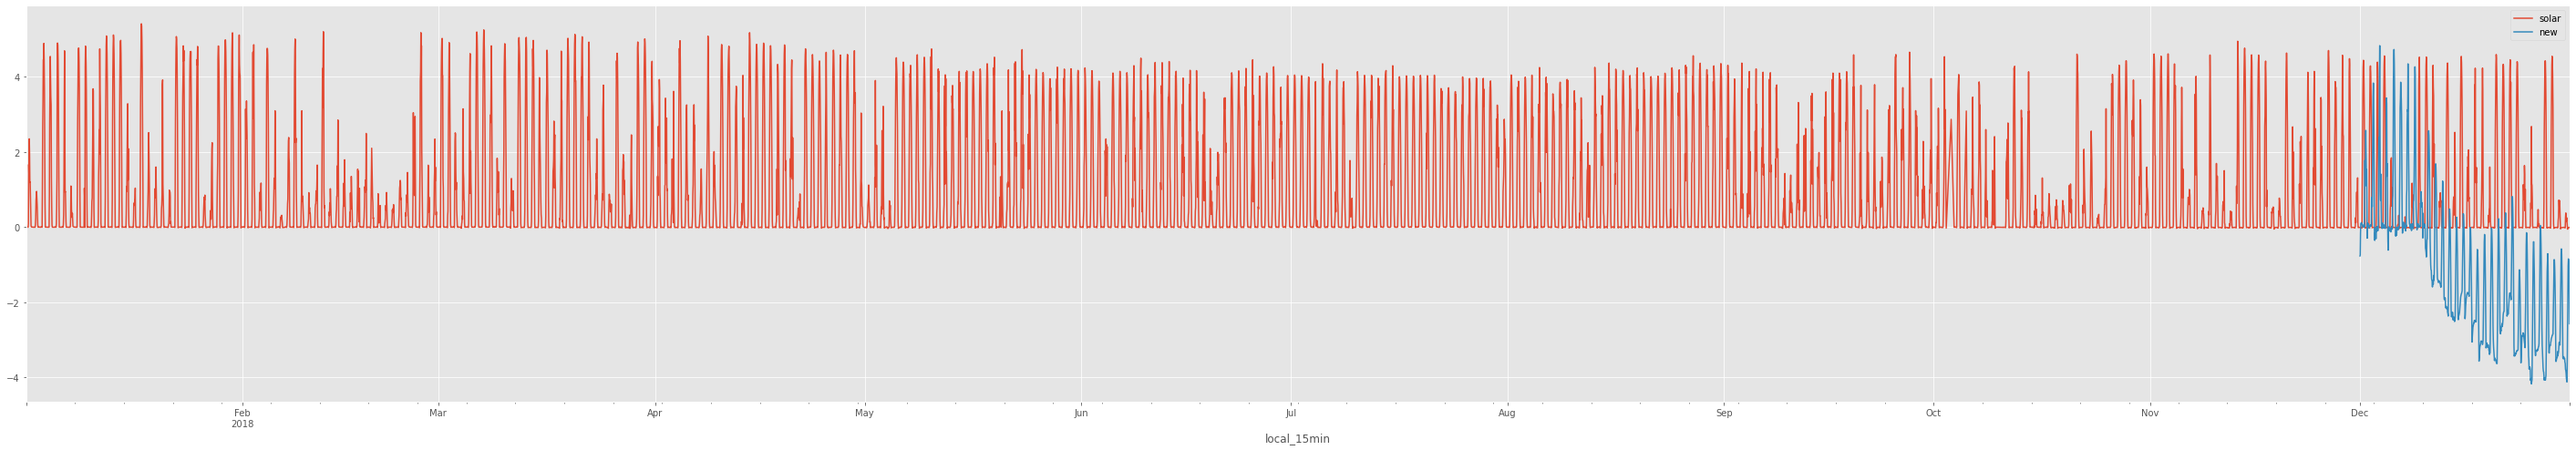

In [5]:

to_pre = test[:520]
data['new'] = result.predict(start = pd.to_datetime('2018-12-1 00:00').to_period(freq = 'H'), end = pd.to_datetime('2018-12-31 23:00').to_period(freq = 'H'), exog = to_pre[['temperature', 'cloud_cover']])


#data['forecast']=result.predict(start = datetime(2018, 10, 30))
data[['solar','new']].plot(figsize=(50,8))
#data['forecast']